<a href="https://colab.research.google.com/github/ryan-ribeiro/lia1_2024_2/blob/main/Entregas%20-%20Ryan%20Ribeiro/Desafio_Aula_12_Construindo_um_modelo_com_Keras/Desafio_Aula_12_Construindo_um_modelo_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ponta a Ponta - Construindo um Modelo com Keras - Dataset IMDB**

**Problema:** construir um modelo de Intelig√™ncia Artificial capaz de classificar sentimentos em reviews de filmes, considerando uma classifica√ß√£o bin√°ria (positivo/negativo).

**N√£o h√° m√°gica. H√° matem√°tica!** üßô

**Fonte de dados**

O conjunto de dados [IMDB](https://keras.io/api/datasets/imdb/) √© uma cole√ß√£o de avalia√ß√µes de filmes, amplamente utilizada para tarefas de Processamento de Linguagem Natural (NLP) no aprendizado de m√°quina. O dataset cont√©m 25.000 reviews de treinamento e 25.000 de teste, j√° tokenizados e prontamente dispon√≠veis no Keras.

##Fonte de dados

In [ ]:
from keras import datasets, layers, models
import keras
import numpy as np

# Configura√ß√µes do dataset
max_features = 20000  # Considera as 20.000 palavras mais frequentes
maxlen = 250  # Considera as primeiras 250 palavras de cada review

# Carrega o dataset IMDB
(reviews_treino, labels_treino), (reviews_teste, labels_teste) = datasets.imdb.load_data(num_words=max_features,
                                                                                         path="imdb.npz",
                                                                                         skip_top=0,
                                                                                         maxlen=None,
                                                                                         seed=113,
                                                                                         start_char=1,
                                                                                         oov_char=2,
                                                                                         index_from=3,)

# Mostra o tamanho dos dados de treino e teste
print(f"{len(reviews_treino)} sequ√™ncias de treino")
print(f"{len(reviews_teste)} sequ√™ncias de teste")

# Padroniza o comprimento das sequ√™ncias para 250 palavras
x_train = keras.utils.pad_sequences(reviews_treino, maxlen=maxlen)
x_val = keras.utils.pad_sequences(reviews_teste, maxlen=maxlen)


25000 sequ√™ncias de treino
25000 sequ√™ncias de teste


##Visualizando as reviews


In [ ]:
# Recupera o √≠ndice de palavras do dataset
word_index = keras.datasets.imdb.get_word_index()
# Reverte o √≠ndice de palavras para obter um dicion√°rio que mapeia √≠ndices para palavras
indices_reviews_invertidos = {i + 3: word for word, i in word_index.items()}
indices_reviews_invertidos[1] = "[START]"
indices_reviews_invertidos[2] = "[OOV]"  ## Out of Vocabulary

## Os √≠ndices est√£o sendo invertidos para que seja poss√≠vel mapear n√∫meros inteiros de volta
## para as palavras correspondentes nas reviews do dataset IMDB.



# Decodifica a primeira sequ√™ncia do dataset de treino
decoded_sequence = " ".join([indices_reviews_invertidos.get(i, "?") for i in reviews_treino[0]])
print(f"Exemplo de review decodificada:\n{decoded_sequence}")


Exemplo de review decodificada:
[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the [OOV] of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these chil

Classes de palavras e Frequ√™ncia de palavras

In [ ]:
# Frequ√™ncia das classes de palavras:
word_index = keras.datasets.imdb.get_word_index()

# Conta o n√∫mero de √≠ndices
total_indices = len(word_index)

# print(f"Frequ√™ncia das palavras: \n{word_index}\n")
print(f"Total de classes de palavras: {total_indices}")


Total de classes de palavras: 88584


##Construindo a Rede Neural com LSTMs Bidirecionais

Os LSTMs bidirecionais s√£o redes neurais recorrentes (RNNs) amplamente utilizadas em processamento de linguagem natural (NLP), reconhecimento de fala, classifica√ß√£o de sons e previs√µes de s√©ries temporais. Sua principal vantagem √© processar sequ√™ncias em ambas as dire√ß√µes, capturando simultaneamente o contexto passado e futuro,  diferente das RNNs unidirecionais, que consideram apenas eventos passados.

Eles possuem uma camada de unidades de mem√≥ria especiais conectadas tanto √†s ativa√ß√µes das c√©lulas anteriores quanto √†s c√©lulas atuais, permitindo acesso a informa√ß√µes de estado oculto do passado e do futuro. Isso ajuda o modelo a analisar depend√™ncias de longa dist√¢ncia e a fazer previs√µes mais precisas sobre os estados futuros.

Com essa capacidade, os LSTMs bidirecionais generalizam melhor para dados n√£o vistos e s√£o especialmente √∫teis em tarefas como an√°lise de sentimentos, onde palavras anteriores e seguintes influenciam o sentimento geral, al√©m de lidarem bem com sequ√™ncias de comprimento vari√°vel.

In [ ]:
# Cria√ß√£o do modelo
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(max_features, 128)(inputs)                     # cada palavra ser√° representada por um vetor de 128 dimens√µes.
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # passa a sequ√™ncia inteira para a pr√≥xima camada
x = layers.Bidirectional(layers.LSTM(64))(x)                        # retorna apenas o √∫ltimo estado para a camada densa
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

# Compila√ß√£o do modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


Model: "functional_3"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_3 (InputLayer)           ‚îÇ (None, None)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ embedding_3 (Embedding)              ‚îÇ (None, None, 128)           ‚îÇ       2,560,000 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_6 (Bidirectional)      ‚îÇ (None, None, 128)           ‚îÇ          98,816 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bidirectional_7 (Bidirectional)      ‚îÇ (None, 128)                 ‚îÇ          98,816 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_3 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ             129 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 2,757,761 (10.52 MB)

 Trainable params: 2,757,761 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

## Treine o modelo

In [ ]:
from keras.callbacks import EarlyStopping

# Definir o callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # Monitora a perda no conjunto de valida√ß√£o
    patience=3,               # Para ap√≥s 3 √©pocas sem melhora
    restore_best_weights=True # Restaura os pesos da melhor √©poca
)


# Executa o treinamento
history = model.fit(x_train, labels_treino, batch_size=32, epochs=12, validation_data=(x_val, labels_teste), callbacks=[early_stopping])

Epoch 1/12
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 547s 692ms/step - accuracy: 0.7537 - loss: 0.4855 - val_accuracy: 0.8591 - val_loss: 0.3349
Epoch 2/12
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 550s 677ms/step - accuracy: 0.9116 - loss: 0.2307 - val_accuracy: 0.8622 - val_loss: 0.3368
Epoch 3/12
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 562s 677ms/step - accuracy: 0.9535 - loss: 0.1320 - val_accuracy: 0.8683 - val_loss: 0.3862
Epoch 4/12
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 561s 676ms/step - accuracy: 0.9691 - loss: 0.0892 - val_accuracy: 0.8596 - val_loss: 0.4017
Epoch 5/12
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 529s 677ms/step - accuracy: 0.9815 - loss: 0.0572 - val_accuracy: 0.8586 - val_loss: 0.5112
Epoch 6/12
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 527s 675ms/step - accuracy: 0.9865 - loss: 0.0409 - val_accu

Visualizando o treinamento

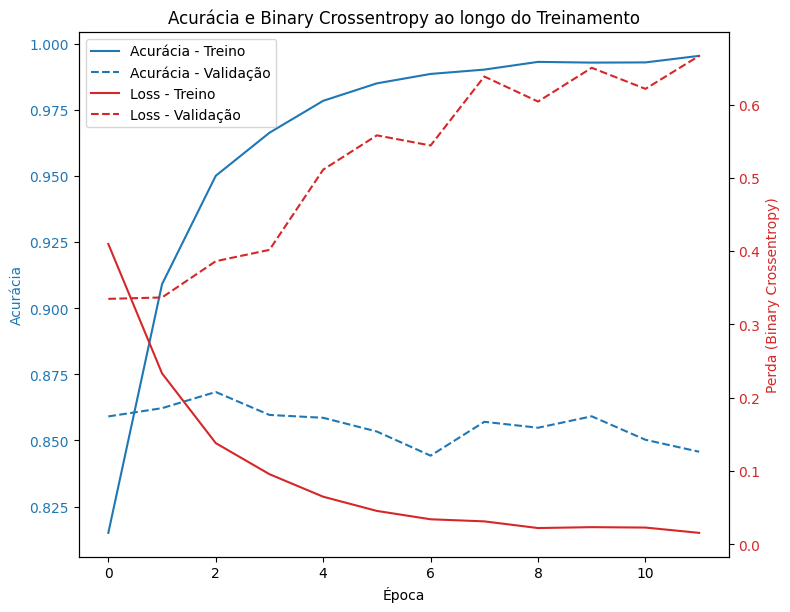

In [ ]:
import matplotlib.pyplot as plt

# Fun√ß√£o para visualizar o dashboard com accuracy e loss no mesmo gr√°fico, com legenda
def plot_combined_dashboard(history):
    # Cria a figura e o eixo
    fig, ax1 = plt.subplots(figsize=(8, 6))

    # Gr√°fico 1: Acur√°cia
    ax1.set_xlabel('√âpoca')
    ax1.set_ylabel('Acur√°cia', color='tab:blue')
    linha1, = ax1.plot(history.history['accuracy'], label='Acur√°cia - Treino', color='tab:blue')
    linha2, = ax1.plot(history.history['val_accuracy'], label='Acur√°cia - Valida√ß√£o', linestyle='--', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Cria um segundo eixo Y que compartilha o eixo X
    ax2 = ax1.twinx()
    ax2.set_ylabel('Perda (Binary Crossentropy)', color='tab:red')
    linha3, = ax2.plot(history.history['loss'], label='Loss - Treino', color='tab:red')
    linha4, = ax2.plot(history.history['val_loss'], label='Loss - Valida√ß√£o', linestyle='--', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # T√≠tulo e exibi√ß√£o do gr√°fico
    fig.tight_layout()

    # Cria a legenda para as linhas
    linhas = [linha1, linha2, linha3, linha4]
    labels = ['Acur√°cia - Treino', 'Acur√°cia - Valida√ß√£o', 'Loss - Treino', 'Loss - Valida√ß√£o']
    plt.legend(linhas, labels, loc='upper left')

    plt.title('Acur√°cia e Binary Crossentropy ao longo do Treinamento')
    plt.show()

# Execute a fun√ß√£o ap√≥s o treinamento do modelo
plot_combined_dashboard(history)


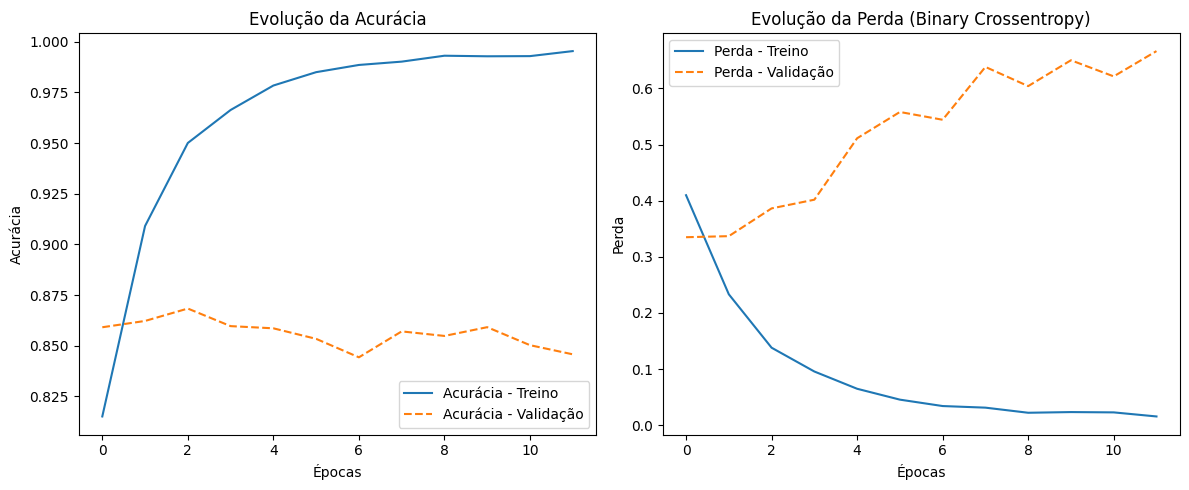

In [ ]:
import matplotlib.pyplot as plt

# Fun√ß√£o para exibir as m√©tricas
def plot_metrics(history):
    # Gr√°fico de acur√°cia
    plt.figure(figsize=(12, 5))

    # Acur√°cia
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Acur√°cia - Treino')
    plt.plot(history.history['val_accuracy'], label='Acur√°cia - Valida√ß√£o', linestyle='--')
    plt.title('Evolu√ß√£o da Acur√°cia')
    plt.xlabel('√âpocas')
    plt.ylabel('Acur√°cia')
    plt.legend()

    # Perda (Binary Crossentropy)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Perda - Treino')
    plt.plot(history.history['val_loss'], label='Perda - Valida√ß√£o', linestyle='--')
    plt.title('Evolu√ß√£o da Perda (Binary Crossentropy)')
    plt.xlabel('√âpocas')
    plt.ylabel('Perda')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Executa a fun√ß√£o de visualiza√ß√£o
plot_metrics(history)


**Previs√£o - Testar o modelo (Deploy)**

Agora vamos prever o sentimento de uma nova review com base em um exemplo do dataset.

In [ ]:
# Seleciona uma review aleat√≥ria do conjunto de valida√ß√£o
print(f"Quantidade de reviews: {len(x_val)}")
review_index = 4  # Altere o √≠ndice para testar outras reviews
review = x_val[review_index]

# Faz a previs√£o
previsao = model.predict(np.expand_dims(review, axis=0))
classe_prevista = "Positiva" if previsao >= 0.5 else "Negativa"

# Decodifica a review selecionada
review_decoded = " ".join([indices_reviews_invertidos.get(i, "?") for i in reviews_teste[review_index]])

print(f"Review {review_index} decodificada:\n{review_decoded}\n")
print(f"Sentimento previsto: {classe_prevista} (Confian√ßa: {previsao[0][0]:.2f})")


Quantidade de reviews: 25000
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 413ms/step
Review 4 decodificada:
[START] like some other people wrote i'm a die hard mario fan and i loved this game br br this game starts slightly boring but trust me it's worth it as soon as you start your hooked the levels are fun and exiting they will hook you [OOV] your mind turns to mush i'm not kidding this game is also orchestrated and is beautifully done br br to keep this spoiler free i have to keep my mouth shut about details but please try this game it'll be worth it br br story 9 9 action 10 1 it's that good [OOV] 10 attention [OOV] 10 average 10

Sentimento previsto: Positiva (Confian√ßa: 1.00)
